In [1]:
import scipy.stats
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('bicicletas-compartidas.csv')

Categoricas

In [3]:
df.columns

Index(['fecha', 'bicis-compartidas', 'temp-obs', 'sens-temp', 'hum', 'viento',
       'codigo-clima', 'festivo', 'findesemana', 'cuartil-ano'],
      dtype='object')

In [4]:
y = df['cuartil-ano'].apply(lambda x: 'cuartil-' + str(int(x)))
val, count_val = np.unique(y, return_counts=True)
print(val)
print(count_val) 
y

['cuartil-0' 'cuartil-1' 'cuartil-2' 'cuartil-3']
[4394 4387 4303 4330]


0        cuartil-3
1        cuartil-3
2        cuartil-3
3        cuartil-3
4        cuartil-3
           ...    
17409    cuartil-3
17410    cuartil-3
17411    cuartil-3
17412    cuartil-3
17413    cuartil-3
Name: cuartil-ano, Length: 17414, dtype: object

In [5]:
y.value_counts()

cuartil-0    4394
cuartil-1    4387
cuartil-3    4330
cuartil-2    4303
Name: cuartil-ano, dtype: int64

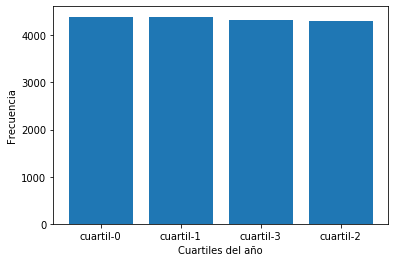

In [21]:
fig, ax = plt.subplots()
ax.bar(y.value_counts().index, y.value_counts())
ax.set_xlabel('Cuartiles del año')
ax.set_ylabel('Frecuencia');

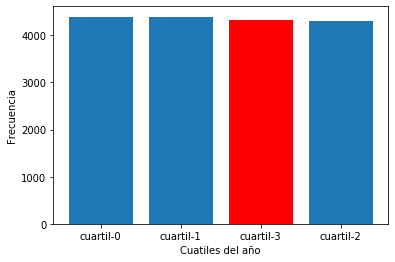

In [22]:
fig, ax = plt.subplots()
ax.bar(y.value_counts().index, y.value_counts())
ax.set_xlabel('Cuatiles del año')
ax.set_ylabel('Frecuencia')
ax.patches[2].set_facecolor('red');

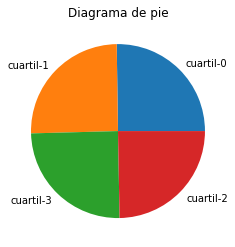

In [23]:
fig, ax = plt.subplots()
ax.pie(y.value_counts(), labels = y.value_counts().index)
ax.set_title('Diagrama de pie');

Numericas

In [24]:
y = df['viento']

In [25]:
y.describe()

count    17414.000000
mean        15.913063
std          7.894570
min          0.000000
25%         10.000000
50%         15.000000
75%         20.500000
max         56.500000
Name: viento, dtype: float64

In [26]:
y.value_counts().head()

12.0    842
11.0    832
14.0    832
15.0    828
13.0    828
Name: viento, dtype: int64

In [31]:
from scipy import stats   #Moda número que mas se repite
stats.mode(y)#[0]

ModeResult(mode=array([12.]), count=array([842]))

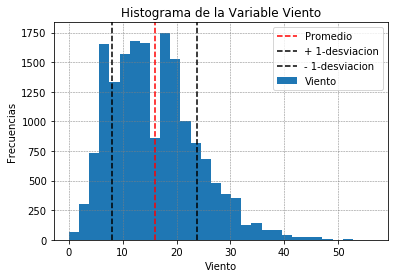

In [34]:
fig, ax = plt.subplots()
ax.hist(y, bins = 30, label = 'Viento')
ax.set_xlabel('Viento')
ax.set_ylabel('Frecuencias')
plt.axvline(np.mean(y), c = 'r', linestyle = '--', label = 'Promedio')
plt.axvline(np.mean(y)+np.std(y), c = 'k', linestyle = '--', label = '+ 1-desviacion')
plt.axvline(np.mean(y)-np.std(y), c = 'k', linestyle = '--', label = '- 1-desviacion')
ax.set_title('Histograma de la Variable Viento')
ax.grid(color= 'gray', linestyle= '--', linewidth= 0.5)
ax.legend(loc='best');
#plt.show()

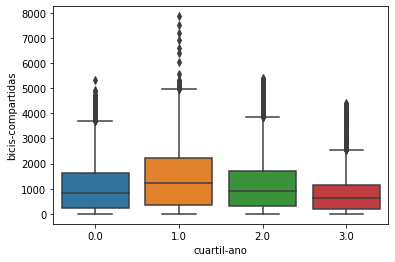

In [39]:
fig, ax = plt.subplots()
sns.boxplot(x = 'cuartil-ano', y = 'bicis-compartidas', data = df );

In [41]:
mask = (df['cuartil-ano']== 0)    #Para ver que esta pasando en el trimestre 0 
df2 = df[mask]

In [43]:
df2['bicis-compartidas'].describe()

count    4394.000000
mean     1103.831589
std      1038.999553
min         0.000000
25%       234.000000
50%       823.000000
75%      1624.000000
max      5322.000000
Name: bicis-compartidas, dtype: float64

Text(0, 0.5, 'Bicis-Compartidas')

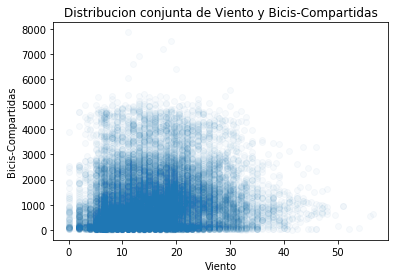

In [33]:
fig, ax = plt.subplots()
ax.scatter( df['viento'], df['bicis-compartidas'] , alpha = 0.03 )
ax.set_title('Distribucion conjunta de Viento y Bicis-Compartidas')
ax.set_xlabel('Viento')
ax.set_ylabel('Bicis-Compartidas')